# Divide and Conquer [Week 8]

- Break a problem into smaller subproblems.
- Solve each subproblem independently.
- Combine solutions to solve the original problem.

Examples:

- **Merge sort**: Sorts an array by dividing and merging.
- **Quick sort**: Sorts by partitioning around a pivot.
- **Binary search**: Finds an element in a sorted array.
- **Counting inversions**: Counts out-of-order pairs in an array.
- **Closest pair of points**: Finds the closest pair among a set of points.
- **Integer multiplication**: Multiplies large integers efficiently.
- **Quick select and Fast select**: Finds the k-th smallest element.
- **Median of Medians (MoM)**: Improves pivot choice in selection algorithms.
- **Fast select using MoM**: Selects an element quickly with better pivoting.

# Count Inversions Problem

https://pdsaiitm.github.io/week-8/summary.html#counting-inversions

https://itzsyboo.medium.com/algorithms-studynote-2-divide-and-conquer-counting-inversions-9e0899bc9e26

**Problem Statement:**

- Given a list of integers.
- Count the number of inversions.
- An inversion is a pair (i, j) where i < j and A[i] > A[j].

**Solution Approach:**

1. **Divide the Array:**
   - Recursively split the array into two halves.

2. **Count Inversions:**
   - In each half, count inversions using the same method.

3. **Merge and Count:**
   - Merge two sorted halves.
   - Count inversions where elements in the left half are greater than elements in the right half.

4. **Combine Counts:**
   - Total inversions = inversions in left half + inversions in right half + inversions during merging.

**Note:**
- This approach is similar to merge sort but includes inversion counts during the merge step.

In [45]:
def merge_and_count(left, right):
  merged = []
  i = j = 0
  count = 0

  # merge the two halves
  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      merged.append(left[i])
      i += 1
    else:
      merged.append(right[j])
      count += len(left) - i
      j += 1

  # append remaining elements
  merged.extend(left[i:])
  merged.extend(right[j:])

  return merged, count


def inversion_count(arr):
  if len(arr) < 2:
    return arr, 0

  mid = len(arr) // 2
  left, count_left = inversion_count(arr[:mid])
  right, count_right = inversion_count(arr[mid:])
  merged, count_merge = merge_and_count(left, right)
  return merged, count_left + count_right + count_merge


# test
arr = [2, 4, 3, 1, 5]
sorted_arr, inversions = inversion_count(arr)
print(sorted_arr, inversions)

[1, 2, 3, 4, 5] 4


**Input:** [2, 4, 3, 1, 5]

**Process:**

1. **Split Array:**
   - Left: [2, 4]
   - Right: [3, 1, 5]

2. **Count Inversions in Left:**
   - Split further: [2] and [4]
     - No inversions in [2] and [4]
   - Combine [2] and [4] (no new inversions)

3. **Count Inversions in Right:**
   - Split further: [3] and [1, 5]
     - Inversions in [1, 5]: 0
     - Merge [3] and [1, 5] with inversions: 1 (pair: (3, 1))

4. **Merge and Count:**
   - Merge sorted halves [2, 4] and [1, 3, 5]:
     - Inversions during merge: 3 (pairs: (2, 1), (4, 1), (4, 3))

5. **Total Count:**
   - Total inversions: 0 (left) + 1 (right) + 3 (merge) = 4

**Result:**

- **Number of Inversions:** 4

# Closest Pair of Points Problem

**Problem Statement:**

- Given a list of points on a 2D plane.
- Find the closest pair of points.
- Use a divide-and-conquer approach.

**Solution Approach:**

1. **Euclidean Distance Function:**
   - Calculate the Euclidean distance between two points using the formula: `sqrt((x2 - x1)^2 + (y2 - y1)^2)`.

2. **Recursive Function:**
   - **Base Cases:**
     - If 2 points, return their distance.
     - If 3 points, return the minimum distance between any two points.
   - **Split Points:**
     - Sort points by x-coordinates.
     - Divide the sorted points into left and right halves at the median.
   - **Recursive Calls:**
     - Recursively find the smallest distance in the left half.
     - Recursively find the smallest distance in the right half.
     - Set delta as the minimum of these two distances.
   - **Create Strip:**
     - Collect points within delta distance from the median line.
     - Sort these points by y-coordinates.

3. **Find Closest in Strip:**
   - Compare each point in the strip with the next 15 points.
   - Update the minimum distance found.

4. **Combine Results:**
   - Return the smallest distance found from the recursive calls and the strip comparison.

In [4]:
import math


def euclidean_distance(p, q):
  return math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)


def closest_pair_recursive(points_sorted_by_x, points_sorted_by_y):
  num_points = len(points_sorted_by_x)

  # base cases
  if num_points == 2:
    return euclidean_distance(points_sorted_by_x[0], points_sorted_by_x[1])
  elif num_points == 3:
    return min(
        euclidean_distance(points_sorted_by_x[0], points_sorted_by_x[1]),
        euclidean_distance(points_sorted_by_x[1], points_sorted_by_x[2]),
        euclidean_distance(points_sorted_by_x[2], points_sorted_by_x[0])
    )

  # split points around the median
  mid = num_points // 2
  left_half_x = points_sorted_by_x[:mid]
  right_half_x = points_sorted_by_x[mid:]
  median_x = right_half_x[0][0]

  # divide points_sorted_by_y into left and right halves
  left_half_y = []
  right_half_y = []
  for point in points_sorted_by_y:
    if point[0] < median_x:
      left_half_y.append(point)
    else:
      right_half_y.append(point)

  # recursive calls to find the smallest distance in each half
  delta_left = closest_pair_recursive(left_half_x, left_half_y)
  delta_right = closest_pair_recursive(right_half_x, right_half_y)
  delta = min(delta_left, delta_right)

  # create the strip of points within delta of the median line
  strip = [point for point in points_sorted_by_y if abs(point[0] - median_x) <= delta]

  # find the closest points in the strip
  min_strip_distance = float('inf')
  strip_length = len(strip)
  for i in range(strip_length):
    for j in range(i + 1, min(i + 15, strip_length)):
      min_strip_distance = min(min_strip_distance, euclidean_distance(strip[i], strip[j]))

  return min(delta, min_strip_distance)


def closest_pair_of_points(points):
  points_sorted_by_x = sorted(points)
  points_sorted_by_y = sorted(points, key=lambda x: x[1])
  return round(closest_pair_recursive(points_sorted_by_x, points_sorted_by_y), 2)


# test
points = [(2, 15), (40, 5), (20, 1), (21, 14), (1, 4), (3, 11)]
result = closest_pair_of_points(points)
print(result)

4.12


# Integer Multiplication using Divide and Conquer

**Problem Statement:**

- Multiply two large integers.
- Use a divide-and-conquer approach.

**Definitions:**

- $x$: First large integer to multiply.
- $y$: Second large integer to multiply.
- $n$: Number of digits in the integers.

**Solution Approach:**

1. **Base Case:**
   - If the number of digits $ n = 1 $, multiply $ x $ and $ y $ directly.
   - Return the product.

2. **Divide Step:**
   - Calculate $ m = n // 2 $.
   - Split each number into high and low halves:
     - `high1` (upper half of $x$) = $ x // 10^m $
     - `low1` (lower half of $x$) = $ x \% 10^m $
     - `high2` (upper half of $y$) = $ y // 10^m $
     - `low2$` (lower half of $y$) = $ y \% 10^m $

3. **Recursive Calls:**
   - Calculate three products recursively:
     - `p` = `fast_multiply(high1, high2, m)` (product of high halves).
     - `q` = `fast_multiply(low1, low2, m)` (product of low halves).
     - `r` = `fast_multiply(high1 + low1, high2 + low2, m)` (product of sums).

4. **Combine Results:**
   - Use the formula:
     - `result` = $ p \times 10^n + (r - p - q) \times 10^m + q $
   - Return the combined result.

In [10]:
def fast_multiply(x, y, n):
  if n == 1:
    return x * y
  else:
    m = n // 2
    high1 = x // 10**m
    low1 = x % 10**m
    high2 = y // 10**m
    low2 = y % 10**m

    a = high1 + low1
    b = high2 + low2

    p = fast_multiply(high1, high2, m)
    q = fast_multiply(low1, low2, m)
    r = fast_multiply(a, b, m)

    return p * 10**n + (r - p - q) * 10**m + q


print(fast_multiply(3456, 8902, 4))

30765312


# Quick Select

**Problem Statement:**

- Find the k-th smallest element in a list using the quickselect algorithm.

**Solution Approach:**

1. **Partitioning:**
   - Choose a pivot element (first element of the list).
   - Rearrange the list such that elements less than the pivot come before it, and elements greater than the pivot come after it.

2. **Recursive Selection:**
   - Determine the position of the pivot after partitioning.
   - Recursively select the k-th smallest element:
     - If k is within the left partition, recursively search the left partition.
     - If k is the pivot element, return the pivot.
     - If k is within the right partition, recursively search the right partition, adjusting k accordingly.

3. **Base Case:**
   - When the list is reduced to a single element, return that element.

In [13]:
def quickselect(arr, left, right, k):
  # k-th smallest in arr[left:right]
  if k < 1 or k > right - left:
    return None

  pivot = arr[left]
  lower = left + 1
  upper = left + 1

  for i in range(left + 1, right):
    if arr[i] > pivot:
      upper += 1
    else:
      arr[i], arr[lower] = arr[lower], arr[i]
      lower += 1
      upper += 1

  arr[left], arr[lower - 1] = arr[lower - 1], arr[left]  # move pivot to its correct place
  lower -= 1

  lower_length = lower - left
  if k <= lower_length:
    return quickselect(arr, left, lower, k)
  elif k == lower_length + 1:
    return arr[lower]
  else:
    return quickselect(arr, lower + 1, right, k - (lower_length + 1))


# test
print(quickselect([5, 3, 7, 2, 1], 0, 5, 2))

2


# Median of Medians

**Problem Statement:**

- Find the median of a list using the Median of Medians algorithm.

**Solution Approach:**

1. **Base Case:**
   - If the list has 5 or fewer elements, sort the list and return the middle element (median).

2. **Divide into Blocks:**
   - Divide the list into blocks of 5 elements each.

3. **Find Block Medians:**
   - Sort each block and find the median of each block.
   - Collect these medians into a new list.

4. **Recursive Call:**
   - Recursively apply the Median of Medians algorithm to the list of block medians.
   - Return the median of the medians.

In [15]:
def median_of_medians(arr):
  # median of medians
  if len(arr) <= 5:
    arr.sort()
    return arr[len(arr) // 2]

  # construct list of block medians
  medians = []
  for i in range(0, len(arr), 5):
    block = arr[i:i + 5]
    block.sort()
    medians.append(block[len(block) // 2])

  return median_of_medians(medians)


# test
print(median_of_medians([4, 3, 5, 6, 2, 1, 8, 9, 7, 10, 13, 15, 18, 17, 11]))

8


# Fast Select using Median of Medians (MoM)

**Problem Statement:**

- Find the k-th smallest element in an unsorted list.
- Use the Median of Medians (MoM) algorithm to ensure efficiency.

**Solution Approach:**

1. **Median of Medians Function:**
   - If the list length is 5 or fewer, sort and return the median.
   - Otherwise, divide the list into blocks of 5, sort each block, and collect medians.
   - Recursively find the median of these medians.

2. **Fast Select Function:**
   - If k is out of bounds (less than 1 or greater than the length of the sublist), return None.
   - Find the MoM pivot and move it to the start of the sublist.
   - Partition the list around the pivot:
     - Elements less than or equal to the pivot go to the left.
     - Elements greater than the pivot go to the right.
   - Determine the position of the pivot.
   - Recursively search in the appropriate partition:
     - If k is in the left partition, search there.
     - If k equals the pivot's position, return the pivot.
     - Otherwise, search in the right partition, adjusting k accordingly.

In [18]:
def median_of_medians(arr):
  # median of medians
  if len(arr) <= 5:
    arr.sort()
    return arr[len(arr) // 2]

  # construct list of block medians
  medians = []
  for i in range(0, len(arr), 5):
    block = arr[i:i + 5]
    block.sort()
    medians.append(block[len(block) // 2])

  return median_of_medians(medians)


def fast_select(arr, left, right, k):
  # k-th smallest in arr[left:right]
  if k < 1 or k > right - left:
    return None

  # find mom pivot and move to arr[left]
  pivot = median_of_medians(arr[left:right])
  pivot_pos = min(i for i in range(left, right) if arr[i] == pivot)
  arr[left], arr[pivot_pos] = arr[pivot_pos], arr[left]

  pivot, lower, upper = arr[left], left + 1, left + 1
  for i in range(left + 1, right):
    if arr[i] > pivot:
      upper += 1
    else:
      arr[i], arr[lower] = arr[lower], arr[i]
      lower, upper = lower + 1, upper + 1
  arr[left], arr[lower - 1] = arr[lower - 1], arr[left]  # move pivot
  lower -= 1

  lower_len = lower - left
  if k <= lower_len:
    return fast_select(arr, left, lower, k)
  elif k == lower_len + 1:
    return arr[lower]
  else:
    return fast_select(arr, lower + 1, right, k - (lower_len + 1))


# test
print(fast_select([4, 3, 5, 6, 2, 1, 8, 9, 7, 10, 13, 15, 18, 17, 11], 0, 15, 4))

4


# Recursion Trees

> Recursion tree visualizes divide-and-conquer recurrence. Each node represents work done at recursion level. Sum all levels for total cost.

- **Definition**: A tree with one node per recursive subproblem.
- **Node Value**: Time spent on the subproblem, excluding recursive calls.

#### Key Concepts

- **Input Size**: $ n $
- **Non-recursive Work**: $ f(n) $
- **Recursive Calls**: $ r $ calls
- **Subproblem Size**: $ n/c $

#### Recurrence Relation

- **Equation**: $ T(n) = rT(n/c) + f(n) $
- **Root Node Value**: $ f(n) $

#### Tree Structure

- **Root**: Value $ f(n) $
- **Children**: Each recursive call is a root of $ T(n/c) $
- **Node Value at Level $ d $**: $ f(n/c^d) $
  - Assume $ n $ is a power of $ c $.

#### Tree Levels

- **Level 0**: $ f(n) $
- **Level 1**: $ r \cdot f(n/c) $
- **Level 2**: $ r^2 \cdot f(n/c^2) $
- **Level $ d $**: $ r^d \cdot f(n/c^d) $

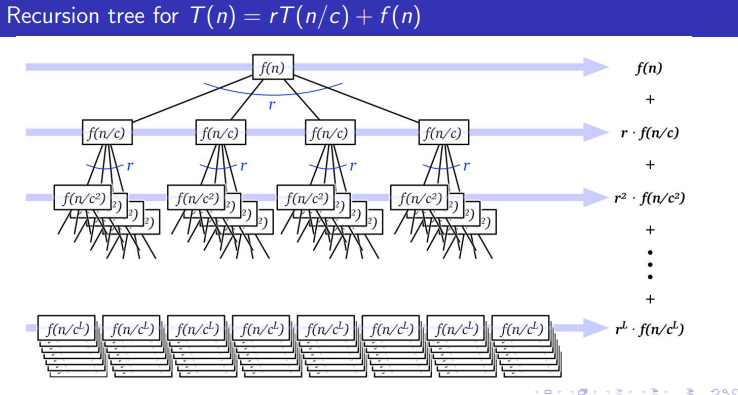
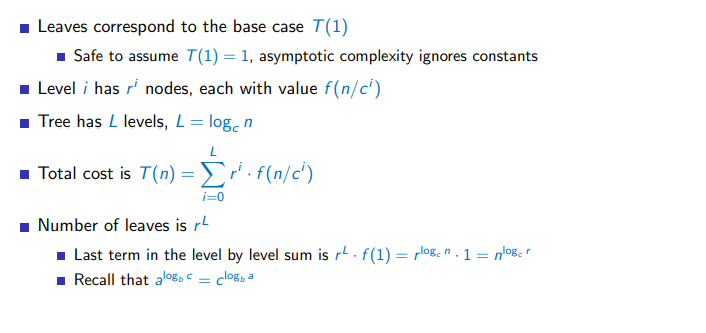
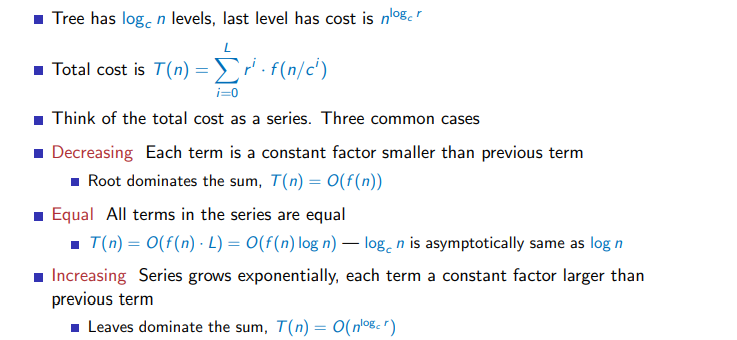

# Recursion Tree Analysis for $ T(n) = rT(n/c) + f(n) $

**Overview**

The recursion tree method is used to analyze the recurrence relation $ T(n) = rT(n/c) + f(n) $.

The steps to derive the total cost by analyzing each level of recursion in the tree 👆👇

**Recursion Tree Structure**

1. **Number of Nodes at Each Level**

   At level $ k $, each node produces $ r $ children, so the number of nodes at level $ k $ is $ r^k $.

2. **Cost at Each Level**

   The cost of each node at level $ k $ is $ f(n / c^k) $. Therefore, the total cost at level $ k $ is:

   $$
   \text{Cost at Level } k = r^k \cdot f(n / c^k)
   $$

3. **Depth of the Tree**

   The depth of the tree is determined by the number of divisions needed until $ n $ becomes less than or equal to 1. This depth is given by:

   $$
   \text{Depth} = \log_c(n)
   $$

4. **Cost at the Last Level**

   At the last level $ k = \log_c(n) $:

   - The number of nodes is $ r^{\log_c(n)} $.
   - The cost at each node at this level is $ f(n / c^{\log_c(n)}) $, which simplifies to $ f(1) $.

   Thus, the total cost at the last level is:

   $$
   \text{Cost at Last Level} = r^{\log_c(n)} \cdot f(1)
   $$

5. **Total Cost Calculation**

   The total cost of the recursion tree is the sum of the costs at all levels. This can be expressed as:

   $$
   \text{Total Cost} = \sum_{k=0}^{\log_c(n)} r^k \cdot f(n / c^k)
   $$

6. **Simplification**

   To simplify, let $ a = \log_c(n) $:

   $$
   \text{Total Cost} = \sum_{k=0}^{a} r^k \cdot f(n / c^k)
   $$

   Assuming $ f(n) $ is polynomial or behaves similarly asymptotically, the total cost can be approximated as:

   $$
   \text{Total Cost} = O(n^{\log_c(r)} \cdot f(n))
   $$


> The total cost of the recurrence relation $ T(n) = rT(n/c) + f(n) $ can be summarized by the formula $ O(n^{\log_c(r)} \cdot f(n)) $, which provides an asymptotic bound based on the growth rates of $ r $, $ c $, and $ f(n) $.